In [1]:
!pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet

In [4]:
df = pd.read_csv("/content/walmart-sales-dataset-of-45stores.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

company_df = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

prophet_df = company_df.rename(
    columns={'Date':'ds', 'Weekly_Sales':'y'}
)

In [5]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    changepoint_prior_scale=0.1
)

model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

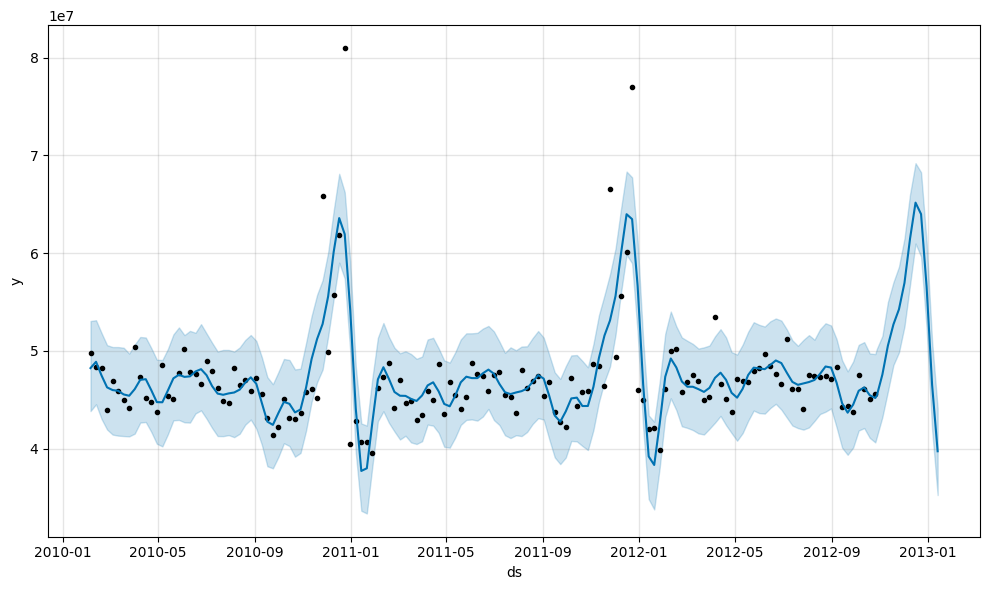

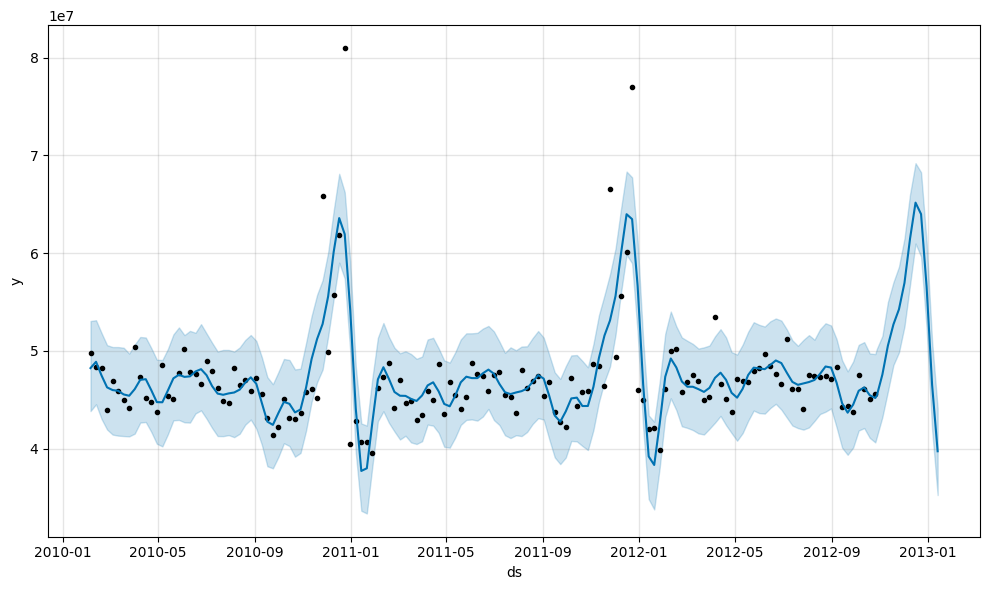

In [7]:
model.plot(forecast)